In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# constantes del sistema
R = 2.27 #Ω
L = 0.0047 #H	
B = 0.003026 #kg.m2/s
J = 0.00246 #kg. m2	
Kb = 0.25 #V/rad/s
Km = 0.25 #N.m/A

def f(t,x):
    i = x[1]
    w = x[0]
    # calculo de vi
    if t < 0.1:
        vi = 0
    else:
        vi = 12
    # calculo de Tl
    if t < 0.5:
        Tl = 0
    else:
        Tl = 0.5

    f1 = -R/L*i - Kb/L*w + 1/L*vi 
    f2 = Km/J*i - B/J*w -1/J * Tl

    return[f2,f1]

# soluciòn de la ecuacion diferencial:
tinicial = 0
tfinal = 1
i0 = 0
w0 = 0
res = solve_ivp(f,[tinicial,tfinal],[i0,w0])

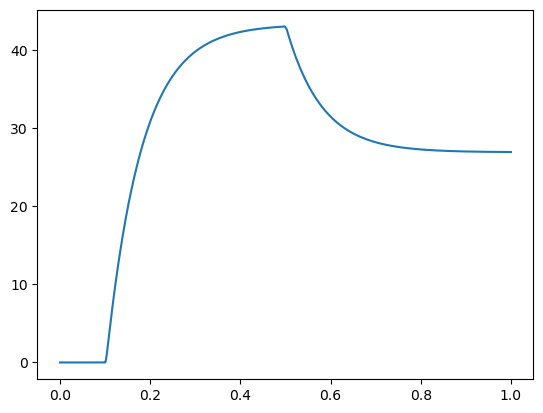

In [12]:
plt.plot(res.t,res.y[0])

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# constantes del sistema
R = 2.27 #Ω
L = 0.0047 #H	
B = 0.003026 #kg.m2/s
J = 0.00246 #kg. m2	
Kb = 0.25 #V/rad/s
Km = 0.25 #N.m/A
kp = 10
TT = [] # tiempos en que se llama a f
VV = [] # tensiones en se llama a f
def f(t,x):
    i = x[1]
    w = x[0]
    # calculo de wr
    if t < 0.1:
        wr = 0
    else:
        wr = 43
    # calculo de Tl
    if t < 0.5:
        Tl = 0
    else:
        Tl = 0.5
    error = wr - w
    vi = kp*error
    if vi > 12:
        vi = 12
    TT.append(t)
    VV.append(vi)
    f1 = -R/L*i - Kb/L*w + 1/L*vi 
    f2 = Km/J*i - B/J*w -1/J * Tl

    return[f2,f1]

# soluciòn de la ecuacion diferencial:
tinicial = 0
tfinal = 1
i0 = 0
w0 = 0
res1 = solve_ivp(f,[tinicial,tfinal],[i0,w0])

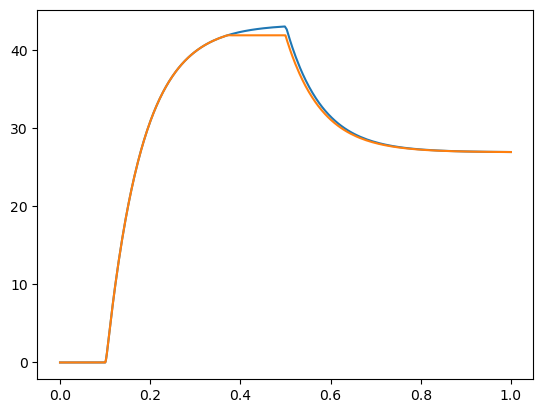

In [28]:
plt.plot(res.t,res.y[0])
plt.plot(res1.t,res1.y[0])

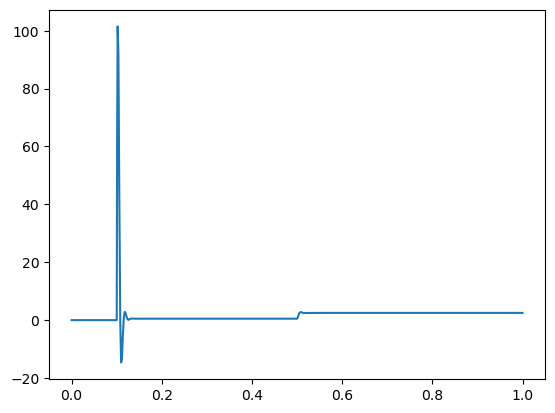

In [17]:
plt.plot(res1.t,res1.y[1])

In [23]:
Vin = []
for k in res1.t:
    for j in range(len(TT)):
        if k == TT[j]:
            vtemp = VV[j]
    Vin.append(vtemp)

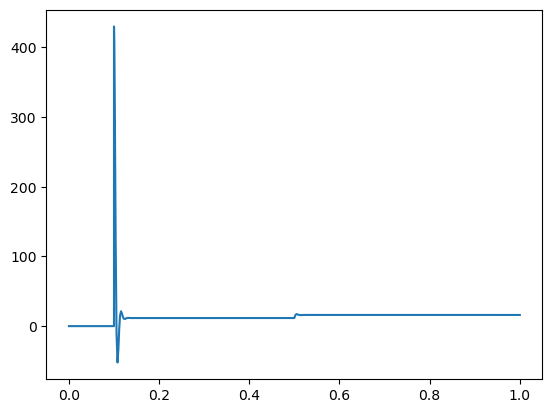

In [26]:
plt.plot(res1.t,Vin)

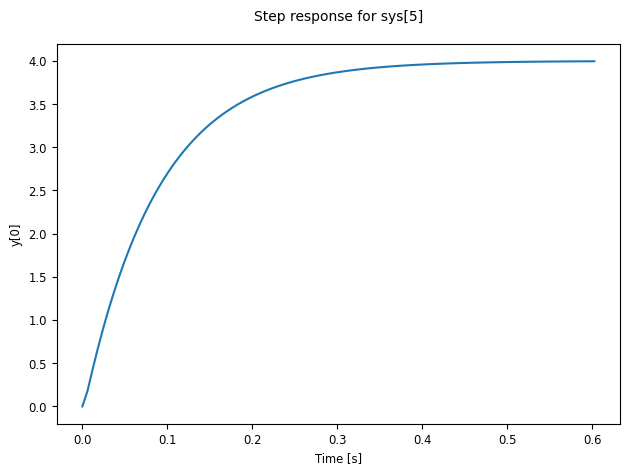

In [33]:
import control as ctl 

sysla = ctl.tf([Km/J/L],[1,R/L,Kb*Km/J/L])
sysla
res_e = ctl.step_response(sysla)
res_e.plot()

In [34]:
sysla.poles()

array([-471.5143009 +0.j,  -11.46442251+0.j])

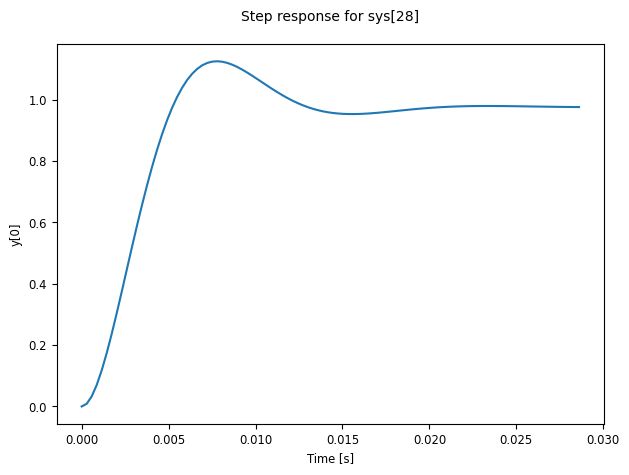

In [46]:
# funcion de transferencia de lazo cerrado
Kp = 10
syslc = ctl.tf([Kp*Km/J/L],[1,R/L,Kb*Km/J/L+Kp*Km/J/L])
res_elc = ctl.step_response(syslc)
res_elc.plot()


In [47]:
syslc.poles()

array([-241.4893617+404.12138505j, -241.4893617-404.12138505j])

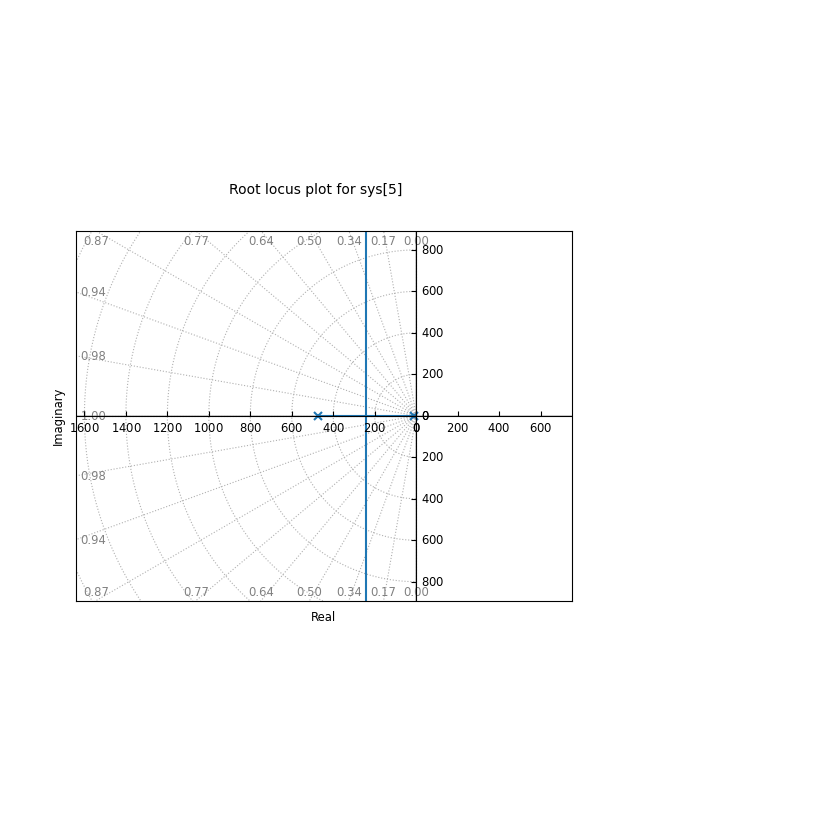

In [48]:
ctl.root_locus(sysla)

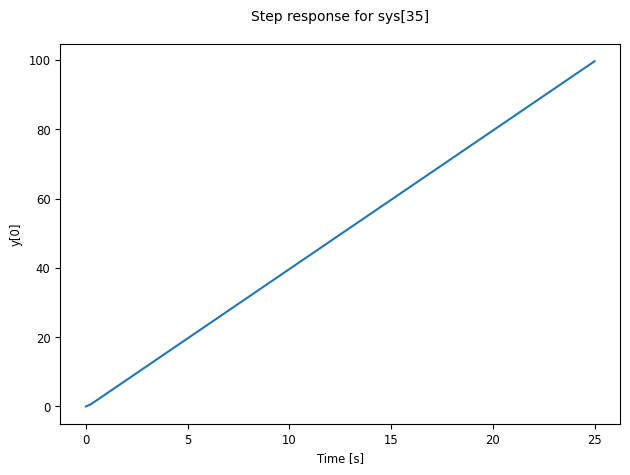

In [51]:
sysla1 = ctl.tf([Km/J/L],[1,R/L,Kb*Km/J/L,0])
sysla1
res_e1 = ctl.step_response(sysla1)
res_e1.plot()

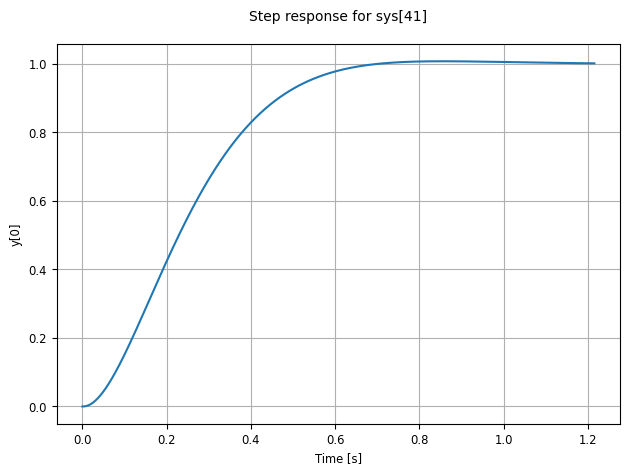

In [53]:
Kp = 1
syslc1 = ctl.tf([Kp*Km/J/L],[1,R/L,Kb*Km/J/L,Kp*Km/J/L])
syslc1
res_e2 = ctl.step_response(syslc1)
res_e2.plot()
plt.grid()

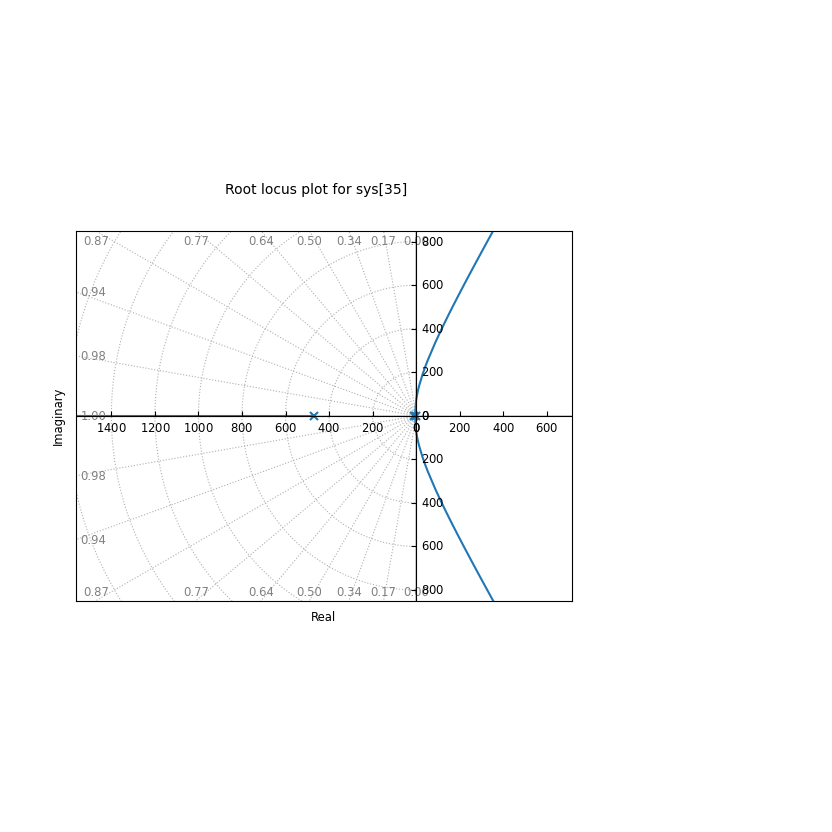

In [54]:
ctl.root_locus(sysla1)